# Kmeans 

In [1]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, load_breast_cancer, load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.image as img
import imageio
from PIL import Image
import numpy as np

## 1.  The Standard Kmeans Algorithm

* Randomly select k unique points from X as initial centroids.

* Group X by finding their closest centroid.

* Update the centroids by the mean of each group.

* Repeat the previous process untill reaching the max_iter or the clusters don't change that much.

In [2]:
def kmeans(X:np.ndarray, k:int, max_iter=30, tolerance=1e-2): 
    c_idx = np.random.choice(X.shape[0],size=k,replace=False) #initialize centroids
    centrals = X[c_idx,:]

    for i in range(max_iter):
        labels = np.array([])
        for x in X:
            d = []
            for j in range(k):
                dist = np.linalg.norm(x - centrals[j])
                d.append(dist)
            labels = np.append(labels,np.argmin(d))
        new_centrals=[]
        for j in range(k):
            new_c = np.mean(X[labels==j], axis=0)
            new_centrals.append(new_c)
        new_centrals = np.array(new_centrals)
        if np.linalg.norm(centrals - new_centrals) <= tolerance:
            return centrals, labels.astype(int)
        else:
            centrals = new_centrals
    return centrals, labels.astype(int)

### Binary Classification: Cancer Data

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)

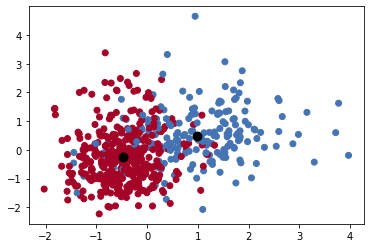

In [4]:
centroids, y_pred = kmeans(X, k=2, tolerance=0.01)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(y_pred)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

Note: The labels of the predicted groups can be different from the actual labels, so the accuracy and f1 scores can be misleading. The main point here is to accurately cluster different points, while the labels do not need to keep the same.

**Confusion Matrix**

In [5]:
confusion_matrix(y_pred,y,labels=[0,1])

array([[175,  14],
       [ 37, 343]])

### Multi-class Classification: Iris Dataset

In [6]:
data = load_iris()
X = data.data
y = data.target
sc = StandardScaler()
X = sc.fit_transform(X)

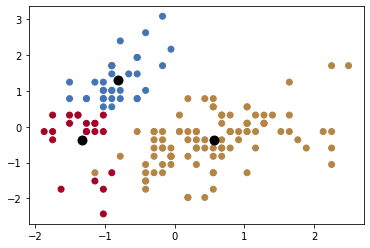

In [7]:
centroids, y_pred = kmeans(X, k=3, tolerance=0.01)
colors=np.array(['#4574B4','#A40227','#b48545'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(y_pred)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

### Disjoint and Nested Structures

Note: Kmeans performs poorly on disjoint and nested structures

[[ 0.48362668  0.32564054]
 [-0.21197671 -0.14571255]]


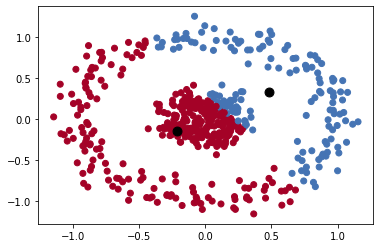

In [8]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2)
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(labels)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

## 2. Kmeans++

* Pick one point from X randomly as the first controid.

* Iteratively pick the left k-1 centroids by choosing the point with the largest distance to its cloest centroid. 

* Group all X by finding their cloest centroid.

* Update the centroids by the means of each group.

* Repeat updating the centroids untill reaching the max_iter or the clusters don't change that much.

In [9]:
def kmeans_plus(X:np.ndarray, k:int, max_iter=30, tolerance=1e-2):        
    c_idx = np.random.choice(X.shape[0],size=1) #pick the first point randomly
    for i in range(k-1):
        centrals = X[c_idx,:]
        x_dist=[]
        for x in X:
            d = []
            for j in range(len(c_idx)):
                dist = np.linalg.norm(x - centrals[j])
                d.append(dist)
            x_dist.append(min(d))
        x_idx = np.argmax(x_dist)
        c_idx = np.append(c_idx,x_idx)
    centrals = X[c_idx,:]

    for i in range(max_iter):
        labels = np.array([])
        for x in X:
            d = []
            for j in range(k):
                dist = np.linalg.norm(x - centrals[j])
                d.append(dist)
            labels = np.append(labels,np.argmin(d))
        new_centrals=[]
        for j in range(k):
            new_c = np.mean(X[labels==j], axis=0)
            new_centrals.append(new_c)
        new_centrals = np.array(new_centrals)
        if np.linalg.norm(centrals - new_centrals) <= tolerance:
            return centrals, labels.astype(int)
        else:
            centrals = new_centrals
    return centrals, labels.astype(int)

### Binary Classification: cancer data

In [10]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
centroids, y_pred = kmeans_plus(X, k=2, tolerance=0.001)

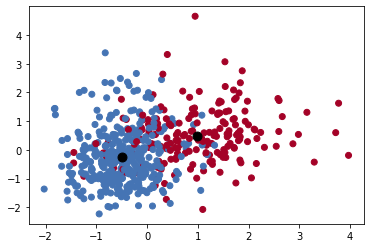

In [12]:
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(y_pred)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

Note: The labels of the predicted groups can be different from the actual labels, so the accuracy and f1 scores can be misleading. The main point here is to accurately cluster different points, while the labels do not need to keep the same.

**Confusion Matrix**

In [13]:
confusion_matrix(y_pred,y,labels=[0,1])

array([[ 37, 344],
       [175,  13]])

### Multi-class Classification: Iris Dataset

In [14]:
data = load_iris()
X = data.data
y = data.target
sc = StandardScaler()
X = sc.fit_transform(X)

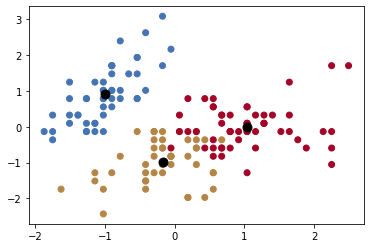

In [15]:
centroids, y_pred = kmeans_plus(X, k=3, tolerance=0.01)
colors=np.array(['#4574B4','#A40227','#b48545'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(y_pred)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

### Disjoint and Nested Structures

Note: Kmeans++ performs poorly on disjoint and nested structures.

[[ 0.08109431  0.32246289]
 [-0.12504942 -0.45548506]]


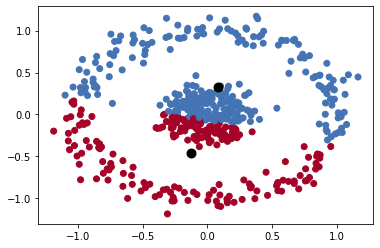

In [16]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans_plus(X, 2)
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[np.array(labels)])
plt.scatter([dot[0] for dot in centroids], [dot[1] for dot in centroids], c='black', s=80)
plt.show()

## Apply Kmeans++ to Image Compression

Original photo


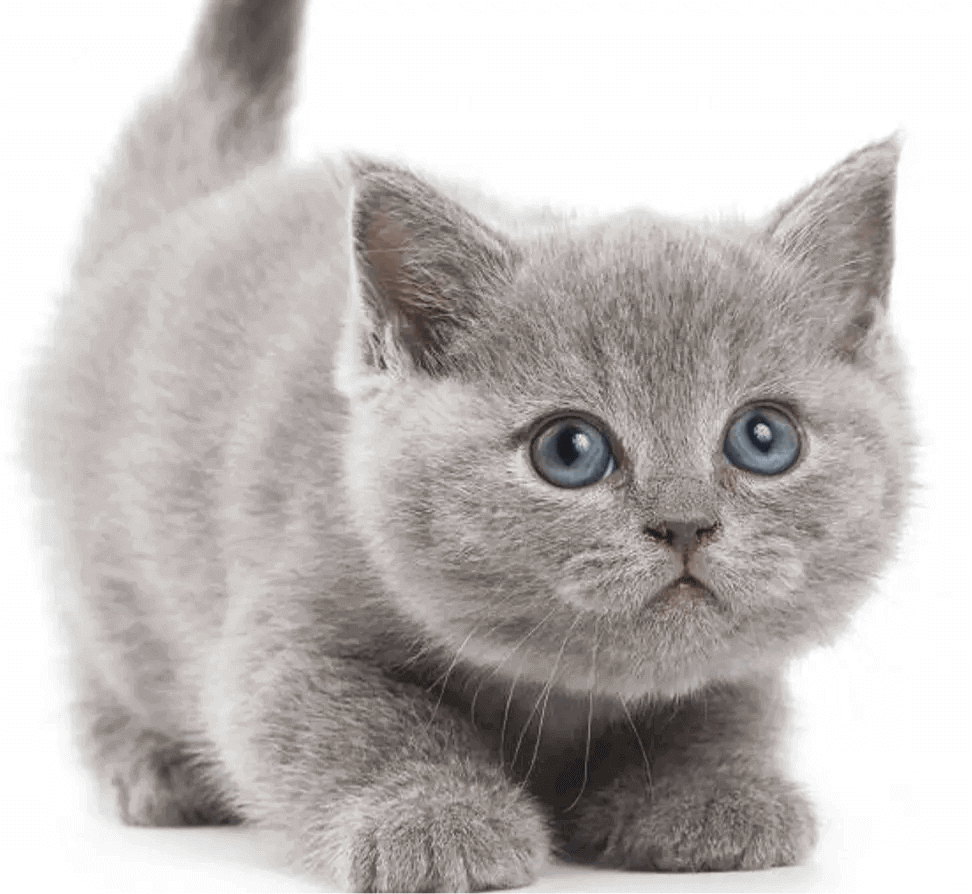

In [17]:
print('Original photo')
Image.open('mincat.png')

In [18]:
img =  imageio.imread('mincat.png') 
h, w, l = img.shape
img = img.reshape(h*w, l)
centroids, labels = kmeans_plus(img, k=4, tolerance=.01)
centroids = centroids.astype('uint8')
X = centroids[labels] # reassign all points
img_ = Image.fromarray(X.reshape(h,w,l))

After Compression


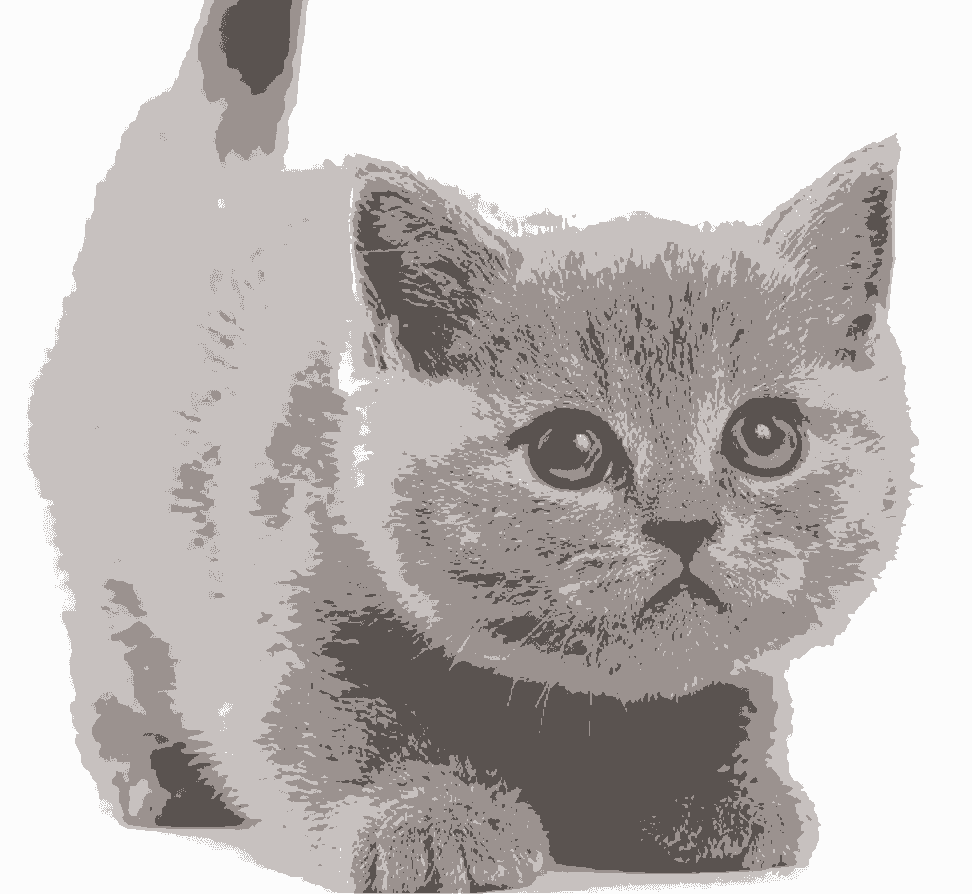

In [19]:
print('After Compression')
img_

## 3. Spectral clustering

* Use similarity matrix in graph theory to detect communities.

**Spectral clustering can predict nested distributions well.**

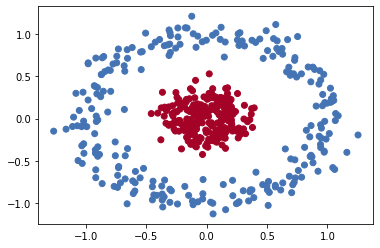

In [20]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors") #from sklearn
labels = cluster.fit_predict(X)  
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()